In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
import sqlite3
conn = sqlite3.connect('data/tn.movie_budgets.csv.gz')
cur = conn.cursor()

In [2]:
df11 = pd.read_csv('data/imdb.title_rating_summary.csv')

In [3]:
#realease date, movie, budget, worldwide gross
df10 = pd.read_csv('data/tn.movie_budgets.csv.gz')
df12 = pd.read_csv('data/tn.profit_movie_budgets.csv')
df12_new = pd.read_csv('data/tn.profit_movie_budgets.csv')
df10.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [186]:
!ls data

bom.movie_gross.csv.gz        imdb.title.ratings.csv.gz
i_tn_profit_clean.csv         imdb.title_rating_summary.csv
imdb.name.basics.csv.gz       rt.movie_info.tsv.gz
imdb.title.akas.csv.gz        rt.reviews.tsv.gz
imdb.title.basics.csv.gz      tmdb.movies.csv.gz
imdb.title.crew.csv.gz        tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz  tn.profit_movie_budgets.csv


In [188]:
df13 = pd.read_csv('data/i_tn_profit_clean.csv')

In [189]:
df13.head()

,Unnamed: 0,primary_title,release_date,release_year,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,1,The Overnight,"Jun 19, 2015",2015,79.0,"Comedy,Mystery",6.1,14828,200000,1109808,1165996,909808,965996
1,2,The Secret Life of Walter Mitty,"Dec 25, 2013",2013,114.0,"Adventure,Comedy,Drama",7.3,275300,91000000,58236838,187861183,-32763162,96861183
2,3,A Walk Among the Tombstones,"Sep 19, 2014",2014,114.0,"Action,Crime,Drama",6.5,105116,28000000,26017685,62108587,-1982315,34108587
3,4,Jurassic World,"Jun 12, 2015",2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,215000000,652270625,1648854864,437270625,1433854864
4,5,The Three Stooges,"Apr 13, 2012",2012,92.0,"Comedy,Family",5.1,28570,30000000,44338224,54052249,14338224,24052249


In [4]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 10 columns):
Unnamed: 0           3657 non-null int64
id                   3657 non-null int64
release_date         3657 non-null object
release_year         3657 non-null int64
movie                3657 non-null object
production_budget    3657 non-null int64
domestic_gross       3657 non-null int64
worldwide_gross      3657 non-null int64
domestic_profit      3657 non-null int64
worldwide_profit     3657 non-null int64
dtypes: int64(8), object(2)
memory usage: 285.8+ KB


In [5]:
# only movies that made profit (either market) and release_year column
df12 = pd.read_csv('data/tn.profit_movie_budgets.csv')
df12.head(2)

,Unnamed: 0,id,release_date,release_year,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,0,1,"Dec 18, 2009",2009,Avatar,425000000,760507625,2776345279,335507625,2351345279
1,1,2,"May 20, 2011",2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875


In [6]:
# Convert ints to be more readable
df12_new.production_budget = df12_new.production_budget*.000001
df12_new.domestic_gross = df12_new.domestic_gross*.000001
df12_new.worldwide_gross = df12_new.worldwide_gross*.000001
df12_new.domestic_profit = df12_new.domestic_profit*.000001
df12_new.worldwide_profit = df12_new.worldwide_profit*.000001

In [7]:
#Round off decimals
decimals = pd.Series([2, 2, 2, 2, 2], index=['production_budget', 'domestic_gross', 'worldwide_gross', 'domestic_profit', 'worldwide_profit'])
df12_clean = df12_new.round(decimals)

In [11]:
#rename columns for readability
df12_clean.columns = ['Unnamed','ID','release_Date','release_year','movie_title','production_budget', 'dom_gross','ww_gross', 'dom_profit', 'ww_profit']


In [12]:
df12_clean.head()

,Unnamed,ID,release_Date,release_year,movie_title,production_budget,dom_gross,ww_gross,dom_profit,ww_profit
0,0,1,"Dec 18, 2009",2009,Avatar,425.0,760.51,2776.35,335.51,2351.35
1,1,2,"May 20, 2011",2011,Pirates of the Caribbean: On Stranger Tides,410.6,241.06,1045.66,-169.54,635.06
2,3,4,"May 1, 2015",2015,Avengers: Age of Ultron,330.6,459.01,1403.01,128.41,1072.41
3,4,5,"Dec 15, 2017",2017,Star Wars Ep. VIII: The Last Jedi,317.0,620.18,1316.72,303.18,999.72
4,5,6,"Dec 18, 2015",2015,Star Wars Ep. VII: The Force Awakens,306.0,936.66,2053.31,630.66,1747.31


,Unnamed: 0,id,release_date,release_year,movie,production_budget_mil,domestic_gross_mil,worldwide_gross_mil,domestic_profit_mil,worldwide_profit_mil
0,0,1,"Dec 18, 2009",2009,Avatar,425.0,760.51,2776.35,335.51,2351.35
1,1,2,"May 20, 2011",2011,Pirates of the Caribbean: On Stranger Tides,410.6,241.06,1045.66,-169.54,635.06
2,3,4,"May 1, 2015",2015,Avengers: Age of Ultron,330.6,459.01,1403.01,128.41,1072.41
3,4,5,"Dec 15, 2017",2017,Star Wars Ep. VIII: The Last Jedi,317.0,620.18,1316.72,303.18,999.72
4,5,6,"Dec 18, 2015",2015,Star Wars Ep. VII: The Force Awakens,306.0,936.66,2053.31,630.66,1747.31


In [10]:
# # Check data types for $$ columns
df12_clean['dom_gross'].dtypes
# df12_clean['worldwide_gross_mil'].dtypes
# df12['production_budget'].dtypes

dtype('float64')

In [6]:
# # Coerce $$ columns into floats
# df10['production_budget'] = pd.to_numeric(df10['production_budget'],errors='coerce')
# df10['domestic_gross'] = pd.to_numeric(df10['domestic_gross'],errors='coerce')
# df10['worldwide_gross'] = pd.to_numeric(df10['worldwide_gross'],errors='coerce')

In [6]:
# # Check floats - CONFIRMED
# df10['production_budget'].dtypes

In [7]:
# # Add a column called Profit
# df10['Profit'] = df10.production_budget + df10.worldwide_gross
# df10.head()

In [8]:
# df10['domestic_gross'].dtypes
# # df10['worldwide_gross'].dtypes
# # df10['production_budget'].dtypes

In [12]:
# # Convert release_date to date stamp?
# # Alternative: 
# # This function changes column to only include last for digits of the string, in this case date
# df12_new["release_date"] = df12_new.release_date.apply(lambda date: int(date[-4:])) 

In [14]:
# # OG df12
# df12['release_date']

In [15]:
# # new df12
# df12_new['release_date']

## Movies made in the last 10 years

In [98]:
# subset of movies made within the last 10 years with under $1,250,000,000 ww_profit
df12_10yrs = df12_clean[df12_clean['release_year'] > 2010]
df12_10yrs.head()


# df12_10yrs = df12_clean[df12_clean['release_year'] 
#                         > 2010][df12_clean['ww_profit'] 
#                                < 1250][df12_clean['ww_profit'] < 1250]


,Unnamed,ID,release_Date,release_year,movie_title,production_budget,dom_gross,ww_gross,dom_profit,ww_profit
1,1,2,"May 20, 2011",2011,Pirates of the Caribbean: On Stranger Tides,410.6,241.06,1045.66,-169.54,635.06
2,3,4,"May 1, 2015",2015,Avengers: Age of Ultron,330.6,459.01,1403.01,128.41,1072.41
3,4,5,"Dec 15, 2017",2017,Star Wars Ep. VIII: The Last Jedi,317.0,620.18,1316.72,303.18,999.72
4,5,6,"Dec 18, 2015",2015,Star Wars Ep. VII: The Force Awakens,306.0,936.66,2053.31,630.66,1747.31
5,6,7,"Apr 27, 2018",2018,Avengers: Infinity War,300.0,678.82,2048.13,378.82,1748.13


In [14]:
df12_10yrs.describe()

,Unnamed,ID,release_year,production_budget,dom_gross,ww_gross,dom_profit,ww_profit
count,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000
mean,2253.853426,51.991327,2014.404163,51.070173,73.236193,187.378786,22.166010,136.308595
std,1646.569635,28.605736,2.356960,59.581505,95.624331,261.394429,66.787845,216.481263
min,1.000000,1.000000,2011.000000,0.020000,0.000000,0.140000,-201.940000,0.010000
25%,769.000000,28.000000,2012.000000,10.000000,16.680000,36.070000,-4.800000,15.250000
50%,2020.000000,53.000000,2014.000000,29.000000,43.040000,88.070000,6.750000,53.210000
75%,3587.000000,77.000000,2016.000000,66.000000,88.630000,217.370000,35.440000,151.090000
max,5748.000000,100.000000,2019.000000,410.600000,936.660000,2053.310000,630.660000,1748.130000


## Movies made in the last 5 years

In [117]:
# # subset of movies made within the last 5 years with under $1,250,000,000 ww_profit
# df12_5yrs = df12_clean[df12_clean['release_year'] 
#                        > 2015][df12_clean['ww_profit'] 
#                                < 1250][df12_clean['ww_profit'] < 1250]
# df12_5yrs.sort_values("ww_profit", ascending = False).head()




### Correlation check 
###### check out budget vs WW profit

Group by release year? <br>
Group by time of year?

In [113]:
# Sort by profit
df12_10yrs.sort_values("ww_profit", ascending = False).head(5)

,Unnamed,ID,release_Date,release_year,movie_title,production_budget,dom_gross,ww_gross,dom_profit,ww_profit
5,6,7,"Apr 27, 2018",2018,Avengers: Infinity War,300.0,678.82,2048.13,378.82,1748.13
4,5,6,"Dec 18, 2015",2015,Star Wars Ep. VII: The Force Awakens,306.0,936.66,2053.31,630.66,1747.31
31,33,34,"Jun 12, 2015",2015,Jurassic World,215.0,652.27,1648.85,437.27,1433.85
64,66,67,"Apr 3, 2015",2015,Furious 7,190.0,353.01,1518.72,163.01,1328.72
24,26,27,"May 4, 2012",2012,The Avengers,225.0,623.28,1517.94,398.28,1292.94


In [114]:
# Sort by budget
df12_10yrs.sort_values("production_budget", ascending = False).head(5)

,Unnamed,ID,release_Date,release_year,movie_title,production_budget,dom_gross,ww_gross,dom_profit,ww_profit
1,1,2,"May 20, 2011",2011,Pirates of the Caribbean: On Stranger Tides,410.6,241.06,1045.66,-169.54,635.06
2,3,4,"May 1, 2015",2015,Avengers: Age of Ultron,330.6,459.01,1403.01,128.41,1072.41
3,4,5,"Dec 15, 2017",2017,Star Wars Ep. VIII: The Last Jedi,317.0,620.18,1316.72,303.18,999.72
4,5,6,"Dec 18, 2015",2015,Star Wars Ep. VII: The Force Awakens,306.0,936.66,2053.31,630.66,1747.31
5,6,7,"Apr 27, 2018",2018,Avengers: Infinity War,300.0,678.82,2048.13,378.82,1748.13


In [169]:
# Filter out butget under $300,000,000 and profit under $1,500,000,000
plot_data = df12_10yrs[df12_10yrs['production_budget'] 
                       < 300][df12_10yrs['ww_profit'] < 1500]


/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


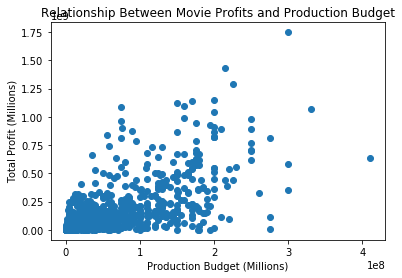

In [205]:

fig, ax = plt.subplots()

ax.set_title('Relationship Between Movie Profits and Production Budget')
ax.set_ylabel('Total Profit (Millions)')
ax.set_xlabel('Production Budget (Millions)')

y1 = plot_data.worldwide_profit
x1 = plot_data.production_budget

plt.scatter(x1,y1)

In [145]:
# Correlation between Profit and Budget
column_1 = df12_10yrs["ww_profit"]
column_2 = df12_10yrs["production_budget"]

correlation = column_1.corr(column_2)
print(f'Correlation between Profit and Budget is {correlation.round(2)}!')

Correlation between Profit and Budget is 0.69!


#### Remove outliers profit

In [155]:
arr = df12_10yrs['ww_profit']
profit_elements = np.array(arr)

profit_mean = np.mean(profit_elements, axis=0)
profit_sd = np.std(profit_elements, axis=0)

profit_list = [x for x in arr if (x > profit_mean - 2 * profit_sd)]
profit_list = [x for x in profit_list if (x < profit_mean + 2 * profit_sd)]
len(profit_list)
# len(arr)

1092

In [176]:
profit_mean = df12_10yrs['ww_profit'].mean()
profit_sd = df12_10yrs['ww_profit'].std()
plot_data = df12_10yrs[(df12_10yrs['ww_profit'] > profit_mean - 2 * profit_sd) & 
           (df12_10yrs['ww_profit'] < profit_mean + 2 * profit_sd)] 


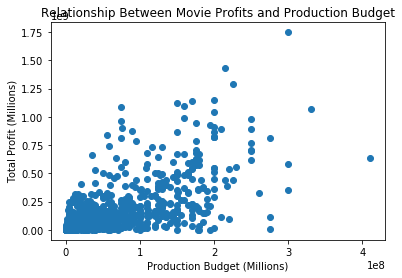

In [210]:
fig, ax = plt.subplots()

ax.set_title('Relationship Between Movie Profits and Production Budget')
ax.set_ylabel('Total Profit (Millions)')
ax.set_xlabel('Production Budget (Millions)')

y1 = plot_data.worldwide_profit
x1 = plot_data.production_budget

plt.scatter(x1,y1)


In [157]:
# New df to exclude outliers
df12_plot1 = [x for x in arr if (x > profit_mean - 2 * profit_sd)]
df12_plot1 = [x for x in profit_list if (x < profit_mean + 2 * profit_sd)]

#### Remove outliers budget

In [156]:
arr2 = df12_10yrs['production_budget']
budget_elements = np.array(arr)

budget_mean = np.mean(budget_elements, axis=0)
budget_sd = np.std(budget_elements, axis=0)

budget_list = [x for x in arr2 if (x > budget_mean - 2 * budget_sd)]
budget_list = [x for x in budget_list if (x < budget_mean + 2 * budget_sd)]
len(budget_list)
# len(arr2)

1153

In [179]:
# budget_mean = df12_10yrs['production_budget'].mean()
# budget_sd = df12_10yrs['production_budget'].std()

# # plot_data = df12_10yrs[(df12_10yrs['production_budget'] > budget_mean - 2 * budget_sd) & 
# #            (df12_10yrs['production_budget'] < budget_mean + 2 * budget_sd)] 

# plot_data = df12_10yrs[df12_10yrs['production_budget'] > 75]

In [190]:
# Using new df13 
budget_mean = df13['production_budget'].mean()
budget_sd = df13['production_budget'].std()

# # Test removing budget outliers
# plot_data = df12_10yrs[(df12_10yrs['production_budget'] > budget_mean - 2 * budget_sd) & 
#            (df12_10yrs['production_budget'] < budget_mean + 2 * budget_sd)] 

plot_data = df13[df13['production_budget'] > 75]

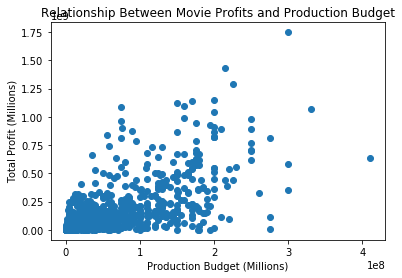

In [206]:
fig, ax = plt.subplots()

ax.set_title('Relationship Between Movie Profits and Production Budget')
ax.set_ylabel('Total Profit (Millions)')
ax.set_xlabel('Production Budget (Millions)')

y1 = plot_data.worldwide_profit
x1 = plot_data.production_budget

plt.scatter(x1,y1)

In [211]:
plot_data1 = df13

profit_mean = df13['worldwide_profit'].mean()
profit_sd = df13['worldwide_profit'].std()
plot_data2 = df13[(df13['worldwide_profit'] > profit_mean - 2 * profit_sd) & 
           (df13['worldwide_profit'] < profit_mean + 2 * profit_sd)] 

plot_data3 = df13[df13['production_budget'] > 75000000]

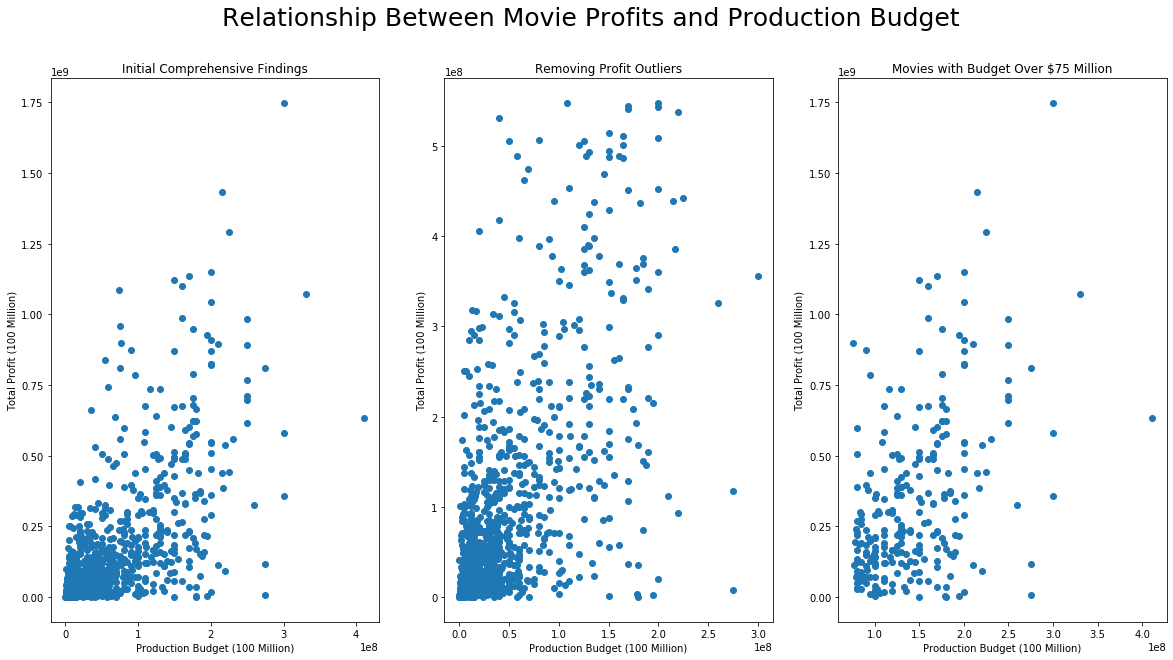

In [276]:
plt.figure(figsize=(20,10))

# fig 1 - Comprehensive Findings
ax1 = plt.subplot(1, 3, 1)

ax1.set_title('Initial Comprehensive Findings')
ax1.set_ylabel('Total Profit (100 Million)')
ax1.set_xlabel('Production Budget (100 Million)')

y1 = plot_data1.worldwide_profit
x1 = plot_data1.production_budget

ax1.scatter(x1,y1)


# fig 2 - Remove profit outliers with +- 2*std
ax2 = plt.subplot(1, 3, 2)

ax2.set_title('Removing Profit Outliers')
ax2.set_ylabel('Total Profit (100 Million)')
ax2.set_xlabel('Production Budget (100 Million)')

y2 = plot_data2.worldwide_profit
x2 = plot_data2.production_budget

ax2.scatter(x2,y2)


# fig 3 - Zooming in on movies with budgets over $75 million
ax3 = plt.subplot(1, 3, 3)

ax3.set_title('Movies with Budget Over $75 Million')
ax3.set_ylabel('Total Profit (100 Million)')
ax3.set_xlabel('Production Budget (100 Million)')

y3 = plot_data3.worldwide_profit
x3 = plot_data3.production_budget

#Plot style
plt.suptitle("Relationship Between Movie Profits and Production Budget", size=25)
plt.savefig("images/budget_profit.png")

ax3.scatter(x3,y3)
plt.show()


# Diving into Genre Profits

In [215]:
plot_data3[['genre1','genre2','genre3']] = plot_data3['genres'].str.split(',', expand = True)

/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [231]:
#Split Genre into columns
genre_profit = plot_data3[(plot_data3['genre1'].isin(['Sci-Fi', 'Animation']))|
         (plot_data3['genre2'].isin(['Sci-Fi', 'Animation']))|
         (plot_data3['genre3'].isin(['Sci-Fi', 'Animation']))
          ].sort_values('worldwide_profit', ascending = False)
genre_profit.head(30)

,Unnamed: 0,primary_title,release_date,release_year,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,genre1,genre2,genre3
924,1406,Avengers: Infinity War,"Apr 27, 2018",2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,300000000,678815482,2048134200,378815482,1748134200,Action,Adventure,Sci-Fi
3,4,Jurassic World,"Jun 12, 2015",2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,215000000,652270625,1648854864,437270625,1433854864,Action,Adventure,Sci-Fi
65,82,The Avengers,"May 4, 2012",2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,225000000,623279547,1517935897,398279547,1292935897,Action,Adventure,Sci-Fi
555,784,Black Panther,"Feb 16, 2018",2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148,200000000,700059566,1348258224,500059566,1148258224,Action,Adventure,Sci-Fi
974,1484,Jurassic World: Fallen Kingdom,"Jun 22, 2018",2018,128.0,"Action,Adventure,Sci-Fi",6.2,219125,170000000,417719760,1305772799,247719760,1135772799,Action,Adventure,Sci-Fi
248,321,Frozen,"Nov 22, 2013",2013,102.0,"Adventure,Animation,Comedy",7.5,516998,150000000,400738009,1272469910,250738009,1122469910,Adventure,Animation,Comedy
745,1102,Avengers: Age of Ultron,"May 1, 2015",2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,330600000,459005868,1403013963,128405868,1072413963,Action,Adventure,Sci-Fi
874,1339,Incredibles 2,"Jun 15, 2018",2018,118.0,"Action,Adventure,Animation",7.7,203510,200000000,608581744,1242520711,408581744,1042520711,Action,Adventure,Animation
923,1405,Captain Marvel,"Mar 8, 2019",2019,123.0,"Action,Adventure,Sci-Fi",7.0,296225,175000000,426525952,1123061550,251525952,948061550,Action,Adventure,Sci-Fi
286,368,Transformers: Dark of the Moon,"Jun 29, 2011",2011,154.0,"Action,Adventure,Sci-Fi",6.2,366409,195000000,352390543,1123790543,157390543,928790543,Action,Adventure,Sci-Fi


### Confirming that Sci-Fi and Animation follow the same trends as overall genres

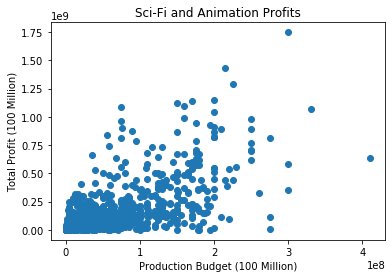

In [240]:
fig, ax4 = plt.subplots()

ax4.set_title('Sci-Fi and Animation Profits')
ax4.set_ylabel('Total Profit (100 Million)')
ax4.set_xlabel('Production Budget (100 Million)')

y4 = genre_profit.worldwide_profit
x4 = genre_profit.production_budget

plt.scatter(x1,y1)

In [235]:
genre_profit.corr()

,Unnamed: 0,release_year,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
Unnamed: 0,1.000000,0.724681,0.022245,-0.135985,-0.289675,-0.092994,0.017270,0.037732,0.056455,0.054608
release_year,0.724681,1.000000,0.147252,-0.040223,-0.243985,-0.009783,0.047523,0.072011,0.058005,0.079049
runtime_minutes,0.022245,0.147252,1.000000,0.236587,0.587353,0.519381,0.348017,0.388801,0.191016,0.340912
averagerating,-0.135985,-0.040223,0.236587,1.000000,0.634949,0.293878,0.464516,0.427658,0.412919,0.416623
numvotes,-0.289675,-0.243985,0.587353,0.634949,1.000000,0.372631,0.514988,0.489465,0.439265,0.471389
production_budget,-0.092994,-0.009783,0.519381,0.293878,0.372631,1.000000,0.503939,0.566437,0.178536,0.460145
domestic_gross,0.017270,0.047523,0.348017,0.464516,0.514988,0.503939,1.000000,0.926420,0.939833,0.922430
worldwide_gross,0.037732,0.072011,0.388801,0.427658,0.489465,0.566437,0.926420,1.000000,0.831294,0.992320
domestic_profit,0.056455,0.058005,0.191016,0.412919,0.439265,0.178536,0.939833,0.831294,1.000000,0.868790
worldwide_profit,0.054608,0.079049,0.340912,0.416623,0.471389,0.460145,0.922430,0.992320,0.868790,1.000000


#### Sci-Fi and Animation genres take up almost half (47%) of all movies with budgets over $ 75 Mil

In [241]:
genre_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 924 to 431
Data columns (total 16 columns):
Unnamed: 0           121 non-null int64
primary_title        121 non-null object
release_date         121 non-null object
release_year         121 non-null int64
runtime_minutes      121 non-null float64
genres               121 non-null object
averagerating        121 non-null float64
numvotes             121 non-null int64
production_budget    121 non-null int64
domestic_gross       121 non-null int64
worldwide_gross      121 non-null int64
domestic_profit      121 non-null int64
worldwide_profit     121 non-null int64
genre1               121 non-null object
genre2               121 non-null object
genre3               120 non-null object
dtypes: float64(2), int64(8), object(6)
memory usage: 16.1+ KB


In [242]:
plot_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 1 to 1030
Data columns (total 16 columns):
Unnamed: 0           259 non-null int64
primary_title        259 non-null object
release_date         259 non-null object
release_year         259 non-null int64
runtime_minutes      259 non-null float64
genres               259 non-null object
averagerating        259 non-null float64
numvotes             259 non-null int64
production_budget    259 non-null int64
domestic_gross       259 non-null int64
worldwide_gross      259 non-null int64
domestic_profit      259 non-null int64
worldwide_profit     259 non-null int64
genre1               259 non-null object
genre2               253 non-null object
genre3               239 non-null object
dtypes: float64(2), int64(8), object(6)
memory usage: 34.4+ KB


### new genre_profit with profit percentage column

In [262]:
genre_profit['profit_percentage'] = (genre_profit.worldwide_profit/genre_profit.production_budget 
                                     * 100).round(1)

genre_profit.sort_values('profit_percentage', ascending = False).head(20)


,Unnamed: 0,primary_title,release_date,release_year,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,genre1,genre2,genre3,profit_percentage
490,673,Despicable Me 2,"Jul 3, 2013",2013,98.0,"Adventure,Animation,Comedy",7.4,344230,76000000,368065385,975216835,292065385,899216835,Adventure,Animation,Comedy,1183.2
481,659,Ice Age: Continental Drift,"Jul 13, 2012",2012,88.0,"Adventure,Animation,Comedy",6.6,175601,95000000,161321843,879765137,66321843,784765137,Adventure,Animation,Comedy,826.1
248,321,Frozen,"Nov 22, 2013",2013,102.0,"Adventure,Animation,Comedy",7.5,516998,150000000,400738009,1272469910,250738009,1122469910,Adventure,Animation,Comedy,748.3
278,360,The Hunger Games,"Mar 23, 2012",2012,142.0,"Action,Adventure,Sci-Fi",7.2,795227,80000000,408010692,677923379,328010692,597923379,Action,Adventure,Sci-Fi,747.4
974,1484,Jurassic World: Fallen Kingdom,"Jun 22, 2018",2018,128.0,"Action,Adventure,Sci-Fi",6.2,219125,170000000,417719760,1305772799,247719760,1135772799,Action,Adventure,Sci-Fi,668.1
3,4,Jurassic World,"Jun 12, 2015",2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,215000000,652270625,1648854864,437270625,1433854864,Action,Adventure,Sci-Fi,666.9
213,279,Venom,"Oct 5, 2018",2018,112.0,"Action,Sci-Fi,Thriller",6.7,275406,116000000,213511408,853628605,97511408,737628605,Action,Sci-Fi,Thriller,635.9
924,1406,Avengers: Infinity War,"Apr 27, 2018",2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,300000000,678815482,2048134200,378815482,1748134200,Action,Adventure,Sci-Fi,582.7
814,1221,Zootopia,"Mar 4, 2016",2016,108.0,"Adventure,Animation,Comedy",8.0,383446,150000000,341268248,1019429616,191268248,869429616,Adventure,Animation,Comedy,579.6
65,82,The Avengers,"May 4, 2012",2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,225000000,623279547,1517935897,398279547,1292935897,Action,Adventure,Sci-Fi,574.6


In [273]:
clean_genre = genre_profit.drop(['release_date', 'release_year', 'runtime_minutes', 'averagerating', 'numvotes', 'genre1', 'genre2', 'genre3'], axis=1)
clean_genre.head()

,Unnamed: 0,primary_title,genres,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,profit_percentage
924,1406,Avengers: Infinity War,"Action,Adventure,Sci-Fi",300000000,678815482,2048134200,378815482,1748134200,582.7
3,4,Jurassic World,"Action,Adventure,Sci-Fi",215000000,652270625,1648854864,437270625,1433854864,666.9
65,82,The Avengers,"Action,Adventure,Sci-Fi",225000000,623279547,1517935897,398279547,1292935897,574.6
555,784,Black Panther,"Action,Adventure,Sci-Fi",200000000,700059566,1348258224,500059566,1148258224,574.1
974,1484,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",170000000,417719760,1305772799,247719760,1135772799,668.1


## Create new DF to show high return movies based on percentage?

In [ ]:
# move decimal points by 1000000 in $$ columns
# add commas in $$ columns?
# add $ signs

clean_genre[''] = 


## df['Value'] = df.apply(lambda x: "{:,}".format(x['Value']), axis=1)

In [ ]:
# Show an interesting point in scatterplot
# df=pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101) })
# plt.plot( 'x', 'y', data=df, linestyle='none', marker='o')

##### The below dataframe (which does not subplot genres) is more exploratory than anything as it doesn't necessarily work with a client such as Microsoft. The larger the profit, the larger reach and more future films to be made.

In [263]:
plot_data2['profit_percentage'] = (plot_data2.worldwide_profit/plot_data2.production_budget 
                                   * 100).round(1)

plot_data2.sort_values('profit_percentage', ascending = False).head(20)

/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,primary_title,release_date,release_year,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,profit_percentage
714,1057,The Gallows,"Jul 10, 2015",2015,81.0,"Horror,Mystery,Thriller",4.2,17763,100000,22764410,41656474,22664410,41556474,41556.5
13,16,The Devil Inside,"Jan 6, 2012",2012,83.0,Horror,4.2,33522,1000000,53262945,101759490,52262945,100759490,10075.9
370,504,Paranormal Activity 2,"Oct 20, 2010",2010,91.0,Horror,5.7,93122,3000000,84752907,177512032,81752907,174512032,5817.1
982,1494,Get Out,"Feb 24, 2017",2017,104.0,"Horror,Mystery,Thriller",7.7,400474,5000000,176040665,255367951,171040665,250367951,5007.4
976,1488,Moonlight,"Oct 21, 2016",2016,111.0,Drama,7.4,227964,1500000,27854931,65245512,26354931,63745512,4249.7
618,894,Chernobyl Diaries,"May 25, 2012",2012,86.0,"Horror,Mystery,Thriller",5.0,60304,1000000,18119640,42411721,17119640,41411721,4141.2
531,746,Paranormal Activity 3,"Oct 21, 2011",2011,83.0,"Horror,Mystery,Thriller",5.8,85689,5000000,104028807,207039844,99028807,202039844,4040.8
841,1282,Annabelle,"Oct 3, 2014",2014,99.0,"Horror,Mystery,Thriller",5.4,122039,6500000,84273813,256862920,77773813,250362920,3851.7
240,310,The Last Exorcism,"Aug 27, 2010",2010,87.0,"Drama,Horror,Thriller",5.6,45815,1800000,41034350,70165900,39234350,68365900,3798.1
984,1497,Dangal,"Dec 21, 2016",2016,161.0,"Action,Biography,Drama",8.5,123638,9500000,12391761,294654618,2891761,285154618,3001.6


### Below charts subset by year 
##### heads( ) ordered by descending WWgross

In [81]:
## Movies from past 5 years to compare results with past 10 years
# fig, ax = plt.subplots()

# x2 = df12_5yrs.ww_profit
# y2 = df12_5yrs.production_budget

# plt.scatter(x2,y2)

In [82]:
# df12_5yrs.sort_values("ww_profit", ascending = False).head(20)

In [ ]:
# df12_5yrs.corr()

In [83]:
# df12_2019 = df12_clean[df12_clean['release_year'] == 2019]
# df12_2019.sort_values('ww_profit', ascending=False)
# df12_2019.describe()

In [84]:
# df12_2018 = df12_clean[df12_clean['release_year'] == 2018]
# df12_2018.sort_values('ww_profit', ascending=False)
# df12_2018.describe()

In [85]:
# df12_2017 = df12_clean[df12_clean['release_year'] == 2017]
# df12_2017.sort_values('ww_profit', ascending=False)
# df12_2017.describe()

In [86]:
# df12_2016 = df12_clean[df12_clean['release_year'] == 2016]
# df12_2016.sort_values('ww_profit', ascending=False)
# df12_2016.describe()

In [87]:
# df12_2015 = df12_clean[df12_clean['release_year'] == 2015]
# df12_2015.sort_values('ww_profit', ascending=False).head()


In [88]:
# df12_2010 = df12_clean[df12_clean['release_year'] == 2010]
# df12_2010.sort_values('ww_profit', ascending=False)
# df12_2010.describe()